https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


## Examples

In [2]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))
model

In [3]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))
model

In [4]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense

# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)

# define the model
model = Model(inputs=x_in, outputs=x_out)
model

## Develop Multilayer Perceptron Models (MLP)

### MLP for Binary Classification

In [5]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('ionosphere.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,
       1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,
       -0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,
       -0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,
       -0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.905
Predicted: 0.997


In [6]:
X_train[:2]

array([[ 1.     ,  0.     ,  0.7087 , -0.24783,  0.64348,  0.04348,
         0.45217,  0.38261,  0.65217,  0.18261,  0.5    ,  0.26957,
         0.57826, -0.23043,  0.50435,  0.37826,  0.38696, -0.42609,
         0.36087, -0.26087,  0.26957,  0.11739,  0.53246, -0.03845,
         0.31304, -0.12174,  0.4993 , -0.04264,  0.48348, -0.04448,
         0.64348, -0.25217,  0.50435,  0.14783],
       [ 0.     ,  0.     ,  1.     ,  1.     ,  0.     ,  0.     ,
         1.     , -1.     ,  1.     , -1.     ,  1.     ,  1.     ,
         1.     ,  1.     ,  1.     , -1.     ,  1.     ,  1.     ,
         1.     ,  1.     ,  1.     , -1.     , -1.     , -1.     ,
         1.     , -1.     ,  1.     , -1.     ,  1.     ,  1.     ,
         0.     ,  0.     ,  1.     , -1.     ]], dtype=float32)

In [7]:
y_train[:20]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

### MLP for Multiclass Classification

In [8]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('iris.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.840
Predicted: [[0.9559287  0.04155393 0.00251741]] (class=0)


In [9]:
X_train[:5]

array([[6.1, 3. , 4.6, 1.4],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3.1, 5.6, 2.4],
       [5. , 3.3, 1.4, 0.2]], dtype=float32)

In [10]:
y_train[:20]

array([1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1])

### MLP for Regression

In [11]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
df = read_csv('housing.csv', header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse')

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(339, 13) (167, 13) (339,) (167,)
MSE: 530.740, RMSE: 23.038
Predicted: 1.633


In [12]:
X_train[:2]

array([[1.19511e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.59000e-01,
        5.60800e+00, 1.00000e+02, 1.28520e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.32090e+02, 1.21300e+01],
       [1.38100e-02, 8.00000e+01, 4.60000e-01, 0.00000e+00, 4.22000e-01,
        7.87500e+00, 3.20000e+01, 5.64840e+00, 4.00000e+00, 2.55000e+02,
        1.44000e+01, 3.94230e+02, 2.97000e+00]])

In [13]:
y_train[:20]

array([27.9, 50. , 17.8,  7. , 20.8, 19.9, 20.6, 48.8, 22.5, 24.4, 22.9,
       19.4, 26.4, 21.6, 27.5, 27.5, 24.8, 30.1, 19.6, 19.5])

## Develop Convolutional Neural Network Models (CNN)

### CNN for image classification in MNIST handwritten digits

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


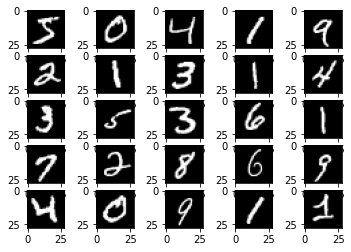

In [14]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()

### CNN model on the MNIST dataset

In [15]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1) 10
Accuracy: 0.987
Predicted: class=5


In [16]:
X_train[:1]

array([[1.19511e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.59000e-01,
        5.60800e+00, 1.00000e+02, 1.28520e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.32090e+02, 1.21300e+01]])

In [17]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

## Develop Recurrent Neural Network Models (RNN)

### LSTM for a univariate time series forecasting problem

In [18]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

# load the dataset
df = read_csv('monthly-car-sales.csv', header=0, index_col=0, squeeze=True)

# retrieve the values
values = df.values.astype('float32')

# specify the window size
n_steps = 5

# split into samples
X, y = split_sequence(values, n_steps)

# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

(91, 5, 1) (12, 5, 1) (91,) (12,)
MSE: 10439964.000, RMSE: 3231.093, MAE: 2885.847
Predicted: 16074.926


In [19]:
X_train[:2]

array([[[ 6550.],
        [ 8728.],
        [12026.],
        [14395.],
        [14587.]],

       [[ 8728.],
        [12026.],
        [14395.],
        [14587.],
        [13791.]]], dtype=float32)

In [20]:
y_train[:20]

array([13791.,  9498.,  8251.,  7049.,  9545.,  9364.,  8456.,  7237.,
        9374., 11837., 13784., 15926., 13821., 11143.,  7975.,  7610.,
       10015., 12759.,  8816., 10677.], dtype=float32)

## Visualize a Deep Learning Model

### Model Text Description

In [21]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


### Model Architecture Plot

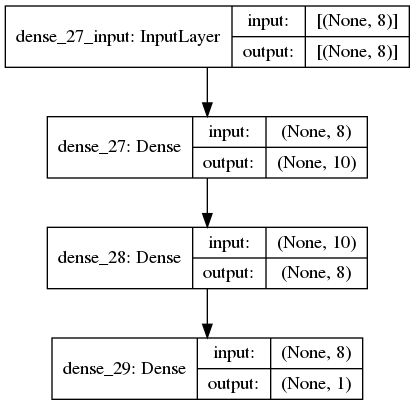

In [22]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
plot_model(model, 'model.png', show_shapes=True)

## Plot Model Learning Curves

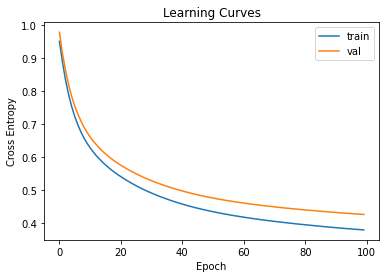

In [23]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

## Save and Load Your Model

In [24]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# save model to file
model.save('model.h5')

In [25]:
# example of loading a saved model
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# load the model from file
model = load_model('model.h5')

# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])

Predicted: 0.872
